# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Rafli Syahrullah
- **Email:** muhammadrafli0409@gmail.com
- **ID Dicoding:** raflisyhrl

## Menentukan Pertanyaan Bisnis

- What are the sales and order delivery trends on Olist's e-commerce platform over time, as well as order patterns by time and day of the week?
- What are the top 10 most and least sold product categories on Olist's e-commerce platform?
- How does late delivery affect customer satisfaction on the Olist e-commerce platform?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Datasets
df_customers = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
df_items = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
df_payments = pd.read_csv("E-Commerce Public Dataset/order_payments_dataset.csv")
df_reviews = pd.read_csv("E-Commerce Public Dataset/order_reviews_dataset.csv")
df_orders = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
df_products = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
df_sellers = pd.read_csv("E-Commerce Public Dataset/sellers_dataset.csv")
df_category_translate = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")

**Insight:**
1. **Customer Dataset (df_customers):** This dataset contains information about customers, including unique customer IDs, zip code prefixes, city, and state.
2. **Order Items Dataset (df_items):** This dataset provides detailed information about ordered items, such as order ID, item ID, product ID, seller ID, shipping deadline, price, and freight value.
3. **Order Payments Dataset (df_payments):** This dataset contains information regarding the payment methods used by customers.
4. **Order Reviews Dataset (df_reviews):** This dataset holds information about customer reviews for their orders.
5. **Orders Dataset (df_orders):** This dataset contains information about orders, including order ID, customer ID, order status, purchase timestamp, and other related details.
6. **Products Dataset (df_products):** This dataset provides information about the products sold, such as product ID, product category name, and other product-specific details.
7. **Sellers Dataset (df_sellers):** This dataset contains information about the sellers.
8. **Product Category Name Translation Dataset (df_category_translate):** This dataset contains the English translation of product category names.

### Assessing Data

In [4]:
# Assessing Data df_customers
print("Information:")
print(df_customers.info())
print("\nMissing Value Count:")
print(df_customers.isna().sum())
print("\nNumber of Duplicates: ", df_customers.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_customers.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Missing Value Count:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of Duplicates:  0

Descriptive Statistics:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441              

In [5]:
# Assessing Data df_items
print("Information:")
print(df_items.info())
print("\nMissing Value Count:")
print(df_items.isna().sum())
print("\nNumber of Duplicates: ", df_items.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_items.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Missing Value Count:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of Duplicates:  0

Descriptive Statistics:
                                order_id  order_item_id  \
count                          

In [6]:
# Assessing Data df_payments
print("Information:")
print(df_payments.info())
print("\nMissing Value Count:")
print(df_payments.isna().sum())
print("\nNumber of Duplicates: ", df_payments.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_payments.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Missing Value Count:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Number of Duplicates:  0

Descriptive Statistics:
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   

In [7]:
# Assessing Data df_reviews
print("Information:")
print(df_reviews.info())
print("\nMissing Value Count:")
print(df_reviews.isna().sum())
print("\nNumber of Duplicates: ", df_reviews.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_reviews.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Missing Value Count:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Number of Duplicates:  0

Descriptive Statistics:
                              

In [8]:
# Assessing Data df_orders
print("Information:")
print(df_orders.info())
print("\nMissing Value Count:")
print(df_orders.isna().sum())
print("\nNumber of Duplicates: ", df_orders.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_orders.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Missing Value Count:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date    

In [9]:
# Assessing Data df_products
print("Information:")
print(df_products.info())
print("\nMissing Value Count:")
print(df_products.isna().sum())
print("\nNumber of Duplicates: ", df_products.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_products.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Missing Value Count:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
pro

In [10]:
# Assessing Data df_sellers
print("Information:")
print(df_sellers.info())
print("\nMissing Value Count:")
print(df_sellers.isna().sum())
print("\nNumber of Duplicates: ", df_sellers.duplicated().sum())
print("\nDescriptive Statistics:")
print(df_sellers.describe(include="all"))

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Missing Value Count:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Number of Duplicates:  0

Descriptive Statistics:
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paul

In [11]:
# Assessing Data df_category_translate
print("Information:")
print(df_category_translate.info())
print("\nMissing Value Count:")
print(df_category_translate.isna().sum())
print("\nNumber of Duplicates: ", df_category_translate.duplicated().sum())
print("\nNumber of Unique Product Categories: ", df_category_translate['product_category_name'].nunique())

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Missing Value Count:
product_category_name            0
product_category_name_english    0
dtype: int64

Number of Duplicates:  0

Number of Unique Product Categories:  71


**Insight:**
- Several columns have integer data types while they should be treated as strings or categorical variables. For instance, the `customer_zip_code_prefix` in `df_customers` should be treated as a string.
- Some datasets still have missing values.

### Cleaning Data

In [12]:
# Convert the customer_zip_code_prefix column to object data type.
df_customers['customer_zip_code_prefix'] = df_customers['customer_zip_code_prefix'].astype(object)

# Ensure consistency in customer_city and customer_state columns (e.g., convert to lowercase).
df_customers['customer_city'] = df_customers['customer_city'].str.lower()
df_customers['customer_state'] = df_customers['customer_state'].str.lower()

In [13]:
# Convert the order_item_id column to object data type.
df_items['order_item_id'] = df_items['order_item_id'].astype(object)

In [14]:
# Replace missing values in review_comment_title and review_comment_message with "No Comment".
df_reviews['review_comment_title'].fillna("No Comment", inplace=True)
df_reviews['review_comment_message'].fillna("No Comment", inplace=True)

<ipython-input-14-1db786297e20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews['review_comment_title'].fillna("No Comment", inplace=True)
<ipython-input-14-1db786297e20>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [15]:
# Convert specified columns in the df_orders to datetime format for accurate time-based analysis
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  df_orders[column] = pd.to_datetime(df_orders[column])

In [16]:
# Convert the seller_zip_code_prefix column to object data type.
df_sellers['seller_zip_code_prefix'] = df_sellers['seller_zip_code_prefix'].astype(object)

In [17]:
# Replace missing values in 'product_category_name' with "Other".
df_products['product_category_name'].fillna("Other", inplace=True)

<ipython-input-17-d0b552335fee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_category_name'].fillna("Other", inplace=True)


**Insight:**
1. Data Type Conversion
  - The `customer_zip_code_prefix` column in the `df_customers dataframe` was converted from integer to string.
  - This ensures that the zip code is treated as a categorical or textual value rather than a numerical value, as zip codes are not typically used for arithmetic operations.

2. Data Consistency
  - The `customer_city` and `customer_state` columns in `df_customers` were converted to lowercase.
  - This helps ensure that there are no inconsistencies due to variations in capitalization, making data analysis more accurate.

3. Handling Missing Values
  - Missing values in the `review_comment_title` and `review_comment_message`columns in `df_reviews` were replaced with "No Comment".
  - This approach allows us to maintain the data integrity and work with the dataset without losing valuable information.
  - Missing values in `product_category_name` in `df_products` were replaced with "Other".
  - This also allows us to maintain the data integrity and work with the dataset without losing valuable information.

4. Data Format Conversion
  - Certain columns in `df_orders` (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) were converted to datetime format.
  - This enables easier and more accurate analysis of time-related information, such as trends in sales over time and order delivery time.


## Exploratory Data Analysis (EDA)

### Merged Data of All Dataframes in The Olist E-Commerce Platform Dataset

In [18]:
# Merging dataframes
df_olist = pd.merge(df_products, df_category_translate, on='product_category_name', how="left")
df_olist = pd.merge(df_olist, df_items, on='product_id', how="left")
df_olist = pd.merge(df_olist, df_sellers, on='seller_id', how="left")
df_olist = pd.merge(df_olist, df_orders, on='order_id', how="left")
df_olist = pd.merge(df_olist, df_customers, on='customer_id', how="left")
df_olist = pd.merge(df_olist, df_payments, on='order_id', how="left")
df_olist = pd.merge(df_olist, df_reviews, on='order_id', how="left")

In [19]:
df_olist['product_category_name_english'].fillna("Other", inplace=True)

<ipython-input-19-2a841539e215>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_olist['product_category_name_english'].fillna("Other", inplace=True)


In [20]:
df_olist

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,1.0,debit_card,1.0,18.30,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,...,1.0,voucher,1.0,265.99,19866247db89845ef558ef19a6c26fcd,5.0,No Comment,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,...,1.0,credit_card,1.0,87.62,32921b4e09c9a19d61fe46ce04231b84,5.0,No Comment,No Comment,2018-07-14 00:00:00,2018-07-16 16:20:04
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,...,1.0,credit_card,2.0,121.84,70949d129965fb1ee32aaccec720a19e,1.0,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,...,1.0,credit_card,4.0,46.19,74c9c7d0bc153bbbc92e4c1597b8ba55,5.0,No Comment,No Comment,2018-04-17 00:00:00,2018-04-18 04:29:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,1.0,boleto,1.0,92.02,80fcb348e6d016ef48890cdd1c499a15,4.0,No Comment,Bom,2018-01-16 00:00:00,2018-01-18 23:07:20
118306,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,1.0,boleto,1.0,159.54,affd1479c0f636f254eaba61fcb93588,5.0,No Comment,No Comment,2018-03-24 00:00:00,2018-03-26 23:42:46
118307,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,1.0,boleto,1.0,159.54,affd1479c0f636f254eaba61fcb93588,5.0,No Comment,No Comment,2018-03-24 00:00:00,2018-03-26 23:42:46
118308,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,...,1.0,boleto,1.0,159.54,affd1479c0f636f254eaba61fcb93588,5.0,No Comment,No Comment,2018-03-24 00:00:00,2018-03-26 23:42:46


In [21]:
df_olist.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,118310,118310,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310,...,118307.000000,118307,118307.000000,118307.000000,117332,117332.000000,117332,117332,117332,117332
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,...,NaN,4,NaN,NaN,97709,NaN,4498,35693,633,97547
top,aca2eb7d00ea1a7b8ebd4e68314663af,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,...,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,No Comment,No Comment,2017-12-19 00:00:00,2017-08-17 22:17:55
freq,536,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11988,...,NaN,87258,NaN,NaN,63,NaN,103440,67650,542,63
mean,NaN,NaN,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,NaN,...,1.094069,NaN,2.943317,172.575102,NaN,4.031390,NaN,NaN,NaN,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,...,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,...,1.000000,NaN,1.000000,60.850000,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,...,1.000000,NaN,2.000000,108.200000,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,...,1.000000,NaN,4.000000,189.260000,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,NaN,...,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,NaN,NaN


### Explore Data Orders & Data Items

In [22]:
# Number of products sold each month
df_olist['date'] = df_olist['order_purchase_timestamp'].dt.to_period('M')
daily_counts = df_olist.groupby('date')['order_id'].count()
daily_counts.rename('count', inplace=True)

,count
date,
2016-09,6
2016-10,385
2016-12,1
2017-01,1023
2017-02,2073
2017-03,3201
2017-04,2864
2017-05,4445
2017-06,3822


In [23]:
# Product sales revenue by month
df_olist['date'] = df_olist['order_purchase_timestamp'].dt.to_period('M')
daily_total_price = df_olist.groupby('date')['price'].sum()
daily_total_price.rename('revenue', inplace=True)

,revenue
date,
2016-09,267.36
2016-10,51068.92
2016-12,10.90
2017-01,129895.32
2017-02,262013.86
2017-03,398117.44
2017-04,392595.36
2017-05,549226.84
2017-06,456867.47


In [24]:
# Product sales by day and hour
df_olist['day_of_week_name'] = df_olist['order_purchase_timestamp'].dt.strftime('%A')
df_olist['hour'] = df_olist['order_purchase_timestamp'].dt.hour

order_counts = df_olist.groupby(['day_of_week_name', 'hour']).size().reset_index(name='count')
peak_orders = order_counts.pivot(index='day_of_week_name', columns='hour', values='count')
peak_orders

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
peak_orders = peak_orders.reindex(days_order)
peak_orders

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week_name,,,,,,,,,,,,,,,,,,,,,
Monday,382,154,76,47,24,29,73,188,576,882,...,1341,1295,1300,1193,1122,1135,1194,1292,1216,860
Tuesday,369,183,96,37,29,28,75,259,599,1057,...,1375,1243,1312,1147,1079,1059,1194,1250,1188,837
Wednesday,504,207,103,40,42,31,108,242,599,1013,...,1288,1168,1251,1146,1016,984,1048,1135,1026,703
Thursday,444,204,88,45,49,30,92,263,614,932,...,1151,1109,1305,1054,931,968,997,973,1049,670
Friday,525,240,81,57,47,41,108,232,597,899,...,1163,1186,1227,979,871,916,853,856,804,636
Saturday,368,200,78,51,31,32,75,119,292,507,...,838,832,805,848,820,890,844,754,644,490
Sunday,325,159,89,48,33,34,42,122,248,383,...,795,821,822,934,1063,1062,1140,1030,1049,709


**Insight:**
1. Sales and Shipping Trends:
  - Through `daily_counts`, we can see the monthly sales trend on the Olist platform.
  - `daily_total_price` shows the trend of monthly total revenue.
  - The `peak_orders` shows the ordering pattern by day and hour of the week.
  - This can help in understanding peak sales periods and adjusting operational strategies accordingly.

2. Top-selling and Under-selling Product Categories:
  - `top_10_categories` shows the top 10 most sold product categories.
  - `bottom_10_categories` shows the top 10 least sold product categories.
  - Understanding popular and less popular product categories can help in stock management strategies, promotions, and product offerings.

3. Effect of Delivery Delays on Customer Satisfaction:
  - `monthly_average_delivery_difference` and `monthly_average_review` show the relationship between delivery delays and customer review scores.
  - This analysis helps identify whether delivery delays negatively impact customer satisfaction.
  - This information is important in optimizing the delivery process and improving customer satisfaction.

### Explore Data Orders with Data Product Category Name Translate

In [25]:
# Top 10 categories
category_order_counts = df_olist.groupby('product_category_name_english')['order_id'].count()
sorted_category_order_counts = category_order_counts.sort_values(ascending=False)

top_10_categories = sorted_category_order_counts.head(10)
top_10_categories.rename('count', inplace=True)

,count
product_category_name_english,
bed_bath_table,11988
health_beauty,10032
sports_leisure,9004
furniture_decor,8832
computers_accessories,8150
housewares,7380
watches_gifts,6213
telephony,4726
garden_tools,4590


In [26]:
# Bottom 10 categories
bottom_10_categories = sorted_category_order_counts.tail(10)
bottom_10_categories.rename('count', inplace=True)

,count
product_category_name_english,
music,40
diapers_and_hygiene,39
flowers,33
fashion_sport,31
home_comfort_2,31
arts_and_craftmanship,24
la_cuisine,16
cds_dvds_musicals,14
fashion_childrens_clothes,8


### Explore Data Reviews & Data Orders (where there is a delay in delivery)

In [27]:
# Difference between the actual delivery time and the estimated time in each month
df_olist['delivery_delay'] = (df_olist['order_delivered_customer_date'] - df_olist['order_estimated_delivery_date']).dt.days
df_delayed = df_olist[df_olist['delivery_delay'] > 0]

monthly_average_delivery_difference = df_delayed.groupby(df_delayed['order_purchase_timestamp'].dt.to_period('M'))['delivery_delay'].mean()
monthly_average_delivery_difference.rename('average_delivery_difference', inplace=True)

,average_delivery_difference
order_purchase_timestamp,
2016-09,36.000000
2016-10,9.500000
2017-01,21.750000
2017-02,17.890625
2017-03,23.719424
2017-04,12.502994
2017-05,14.059701
2017-06,19.035714
2017-07,10.197183


In [28]:
# Average review score in each month
monthly_average_review = df_delayed.groupby(df_delayed['order_purchase_timestamp'].dt.to_period('M'))['review_score'].mean()
monthly_average_review.rename('average_review_score', inplace=True)

,average_review_score
order_purchase_timestamp,
2016-09,1.000000
2016-10,2.500000
2017-01,2.000000
2017-02,2.000000
2017-03,2.385185
2017-04,2.475309
2017-05,2.672131
2017-06,2.550459
2017-07,2.035971


**Insight:**
1. Sales and Shipping Trends:
  - Through `daily_counts`, we can see the monthly sales trend on the Olist platform.
  - `daily_total_price` shows the trend of monthly total revenue.
  - The `peak_orders` shows the ordering pattern by day and hour of the week.
  - This can help in understanding peak sales periods and adjusting operational strategies accordingly.

2. Top-selling and Under-selling Product Categories:
  - `top_10_categories` shows the top 10 most sold product categories.
  - `bottom_10_categories` shows the top 10 least sold product categories.
  - Understanding popular and less popular product categories can help in stock management strategies, promotions, and product offerings.

3. Effect of Delivery Delays on Customer Satisfaction:
  - `monthly_average_delivery_difference` and `monthly_average_review` show the relationship between delivery delays and customer review scores.
  - This analysis helps identify whether delivery delays negatively impact customer satisfaction.
  - This information is important in optimizing the delivery process and improving customer satisfaction.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What are the sales and order delivery trends on Olist's e-commerce platform over time, as well as order patterns by time and day of the week?

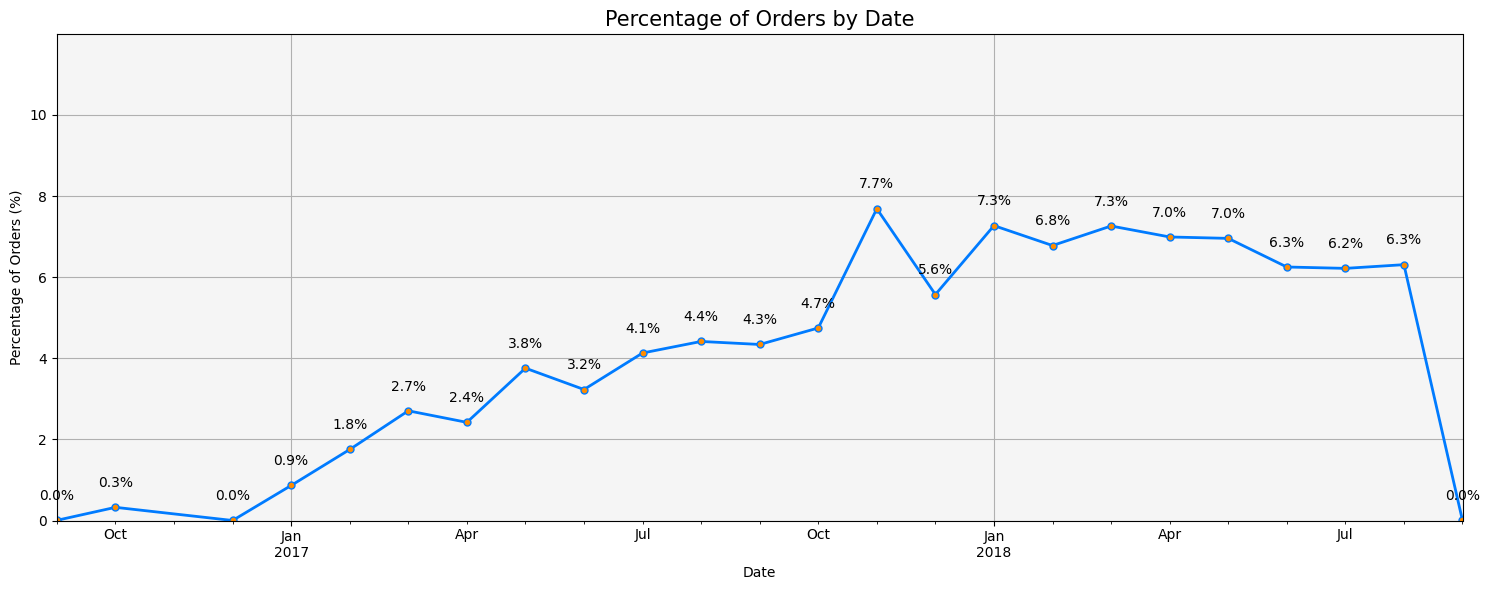

In [29]:
### Order Percentage Trends: 2016-09 to 2018-10
percentage_counts = (daily_counts / daily_counts.sum()) * 100 # percent

plt.figure(figsize=(15, 6))
line_plot = percentage_counts.plot(color='#007BFF', linestyle='-', linewidth=2, marker='o', markersize=5, markerfacecolor='#FF8C00')
plt.title('Percentage of Orders by Date', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Percentage of Orders (%)', fontsize=10)
plt.grid()
plt.ylim(0, percentage_counts.max() + 4.3)
plt.gca().set_facecolor('#F5F5F5')

for x, y in zip(percentage_counts.index, percentage_counts):
    plt.text(x, y + 0.5, f'{y:.1f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

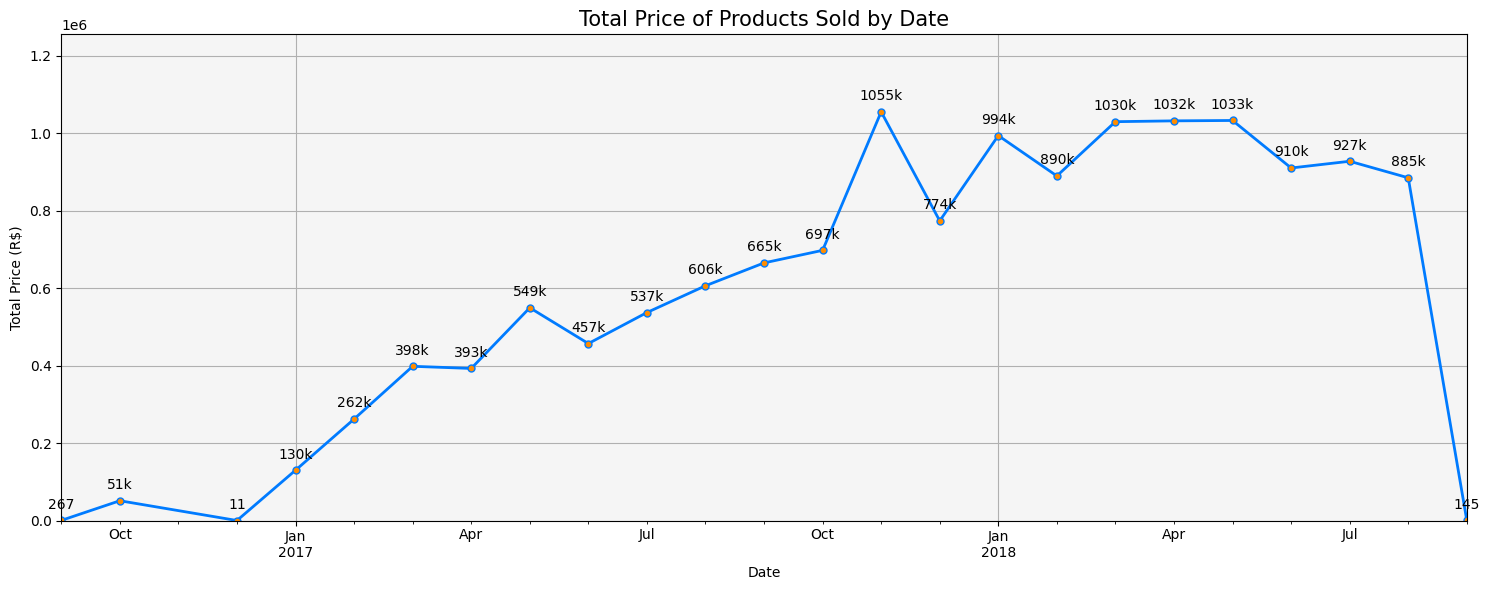

In [30]:
### Total Price of Products Sold: 2016-09 to 2018-10
plt.figure(figsize=(15, 6))
line_plot = daily_total_price.plot(color='#007BFF', linestyle='-', linewidth=2, marker='o', markersize=5, markerfacecolor='#FF8C00')
plt.title('Total Price of Products Sold by Date', fontsize=15)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Price (R$)', fontsize=10)
plt.ylim(0, daily_total_price.max() + 200000)
plt.gca().set_facecolor('#F5F5F5')
plt.grid()

for x, y in zip(daily_total_price.index, daily_total_price):
  if y >= 1000:
    y_label = f'{y/1000:.0f}k'
  else:
    y_label = f'{y:.0f}'
  plt.text(x, y + 30000, y_label, ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

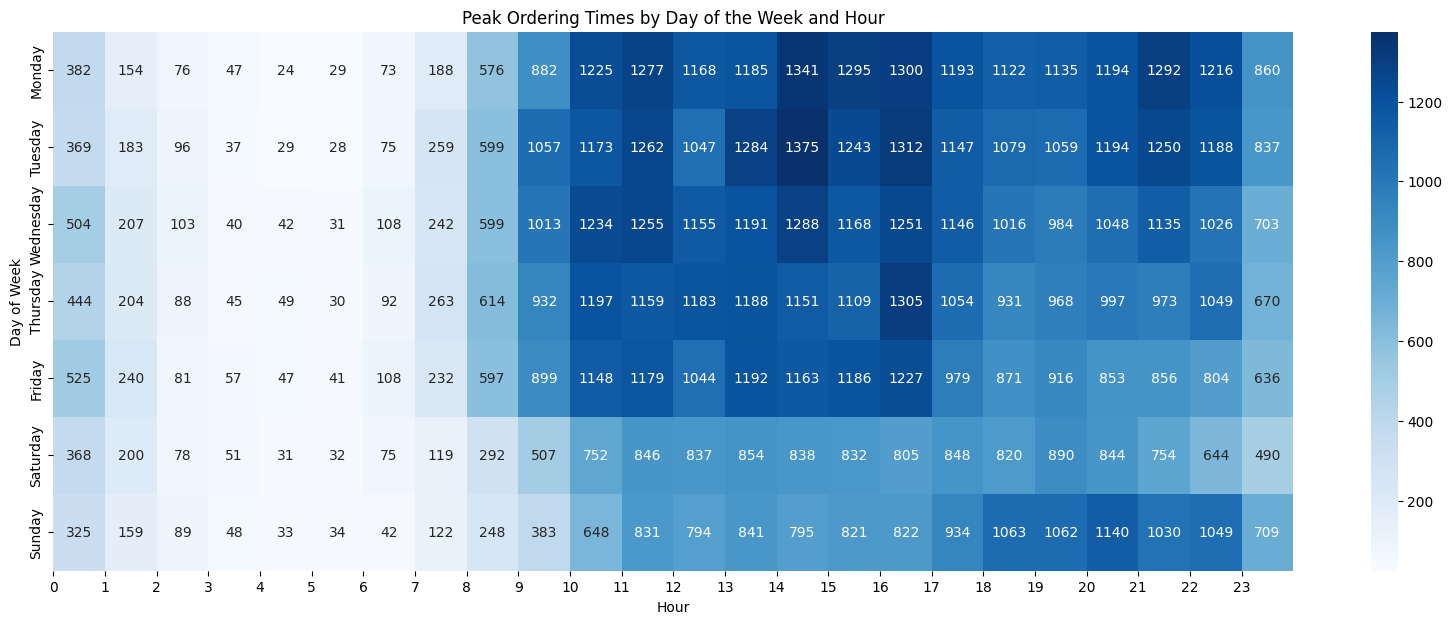

In [31]:
### Peak Ordering Times by Day of the Week and Hour
plt.figure(figsize=(20, 7))
ax = sns.heatmap(peak_orders, cmap="Blues", annot=True, fmt='d', cbar=True)
ax.set_xlabel('Hour')
ax.set_ylabel('Day of Week')
ax.set_title('Peak Ordering Times by Day of the Week and Hour')
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)])

plt.show()

**Insight:**
1. Total Order and Total Revenue Trends:
  - Overall, total orders and total revenue increased from 2016 to 2018, indicating positive business growth.
  - There were seasonal fluctuations, with a significant increase in orders at the end of the year (possibly related to the holiday period).
  - It is important to further analyze the factors that led to the increase or decrease in order volume and revenue, such as promotions, events, or external factors.

2. Peak Ordering Times:
  - Peak ordering times occur mostly on weekdays (Monday - Friday) and during business hours (around 10-17).
  - On Saturdays and Sundays, order volumes tend to be lower.
  - This indicates that most customers place orders during business hours and on business days.

### Pertanyaan 2: What are the top 10 most and least sold product categories on Olist's e-commerce platform?

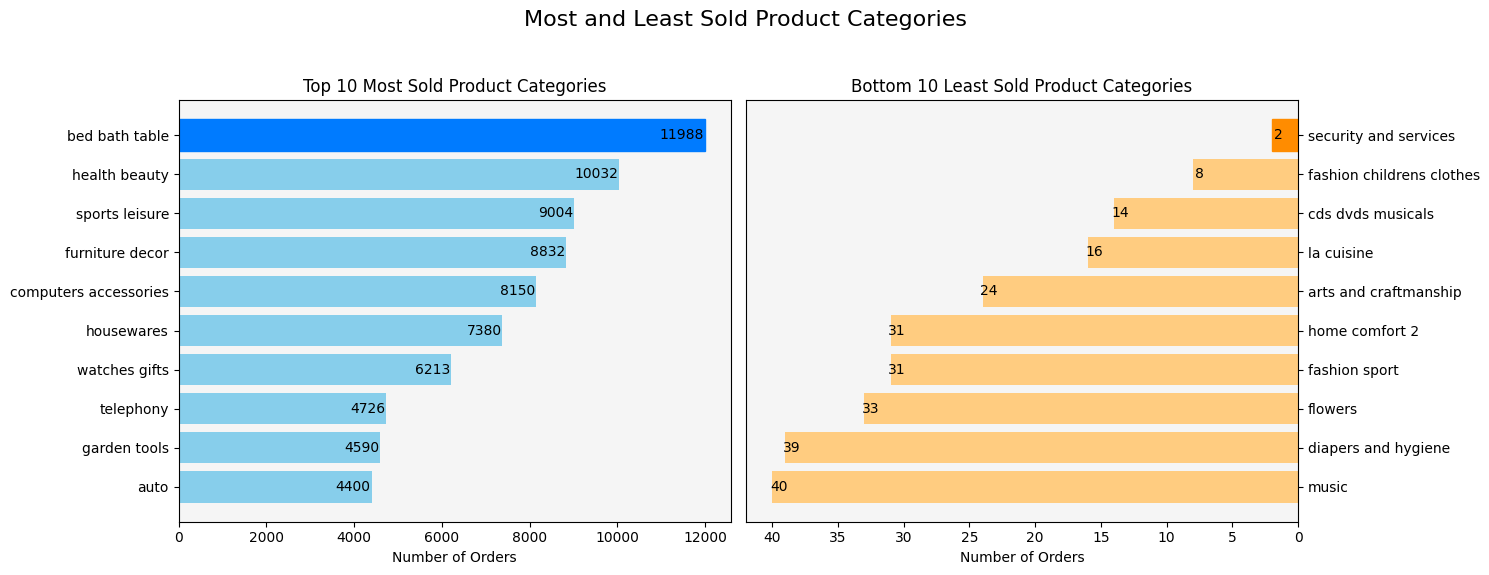

In [32]:
### Most and Least Sold Product Categories
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Most and Least Sold Product Categories", fontsize=16)

top_10_categories.index = top_10_categories.index.str.replace('_', ' ')
bottom_10_categories.index = bottom_10_categories.index.str.replace('_', ' ')

bars_left = axes[0].barh(top_10_categories.index[::-1], top_10_categories.values[::-1], color='skyblue')
bars_left[-1].set_color('#007BFF')
axes[0].set_xlabel('Number of Orders')
axes[0].set_title('Top 10 Most Sold Product Categories')
axes[0].set_facecolor('#F5F5F5')

for bar in bars_left:
    width = bar.get_width()
    axes[0].text(width - 20, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='right', va='center', color='black')

bars_right = axes[1].barh(bottom_10_categories.index, bottom_10_categories.values, color='#FFCC80')
bars_right[-1].set_color('#FF8C00')
axes[1].set_xlabel('Number of Orders')
axes[1].set_title('Bottom 10 Least Sold Product Categories')
axes[1].invert_xaxis()
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_facecolor('#F5F5F5')

for bar in bars_right:
    width = bar.get_width()
    axes[1].text(width - 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:**

Most and Least Sold Product Categories
  - The product categories `bed_bath_table`, `health_beauty`, and `sports_leisure` are among the most sold categories.
  - This shows that items for household, health and beauty, and sports and leisure are in high demand among Olist customers.
  - On the other hand, there are some less-sold product categories, such as `security_and_services`, `cds_dvds_musicals`, and `la_cuisine`.

### Pertanyaan 3: How does late delivery affect customer satisfaction on the Olist e-commerce platform?

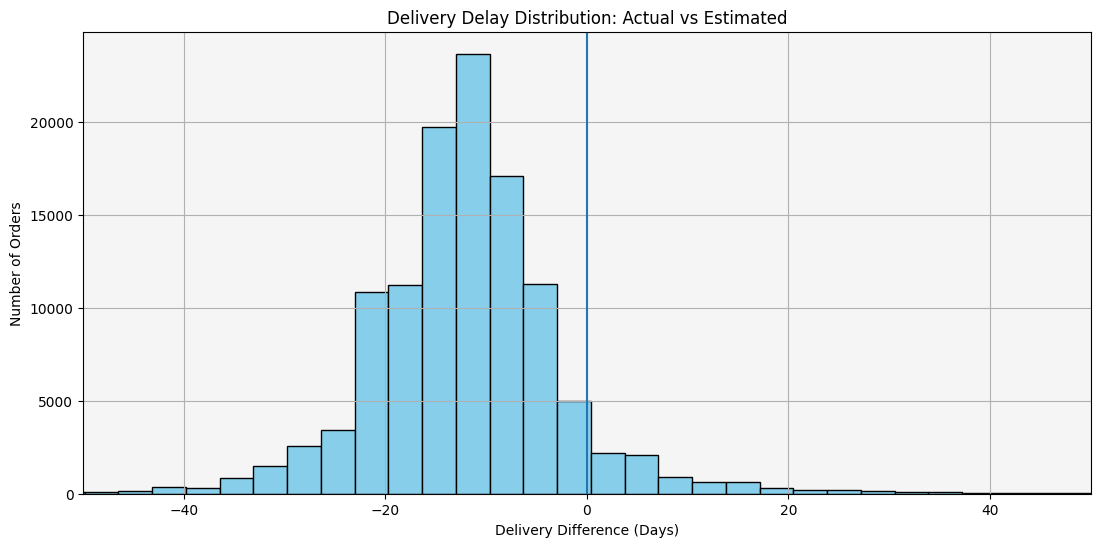

In [33]:
### Delivery Delay Distribution: Actual vs Estimated
df_olist['delivery_delay'] = (df_olist['order_delivered_customer_date'] - df_olist['order_estimated_delivery_date']).dt.days

plt.figure(figsize=(13, 6))
plt.hist(df_olist['delivery_delay'], bins=100, color='skyblue', edgecolor='black')
plt.axvline(x=0)
plt.xlabel('Delivery Difference (Days)')
plt.ylabel('Number of Orders')
plt.title('Delivery Delay Distribution: Actual vs Estimated')
plt.xlim(-50, 50)
plt.gca().set_facecolor('#F5F5F5')
plt.grid()
plt.show()

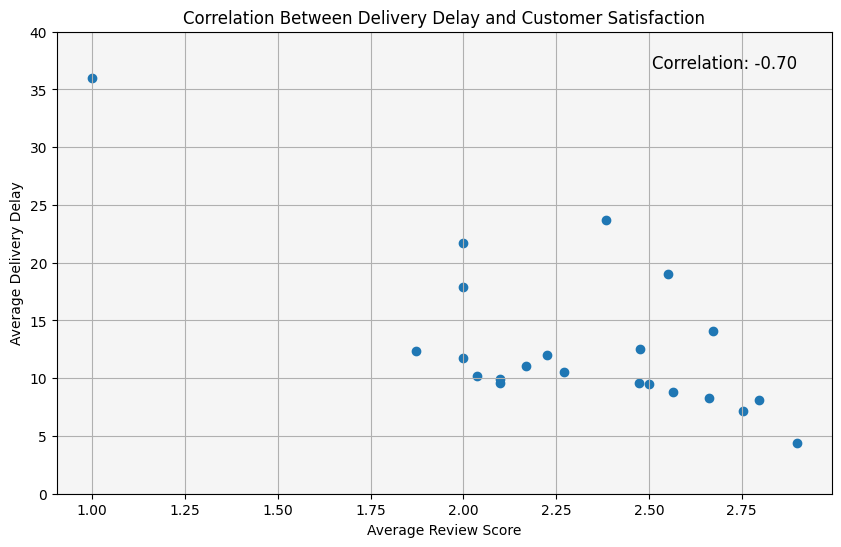

Correlation between average review score and average delivery difference: -0.70


In [34]:
### Correlation Between Delivery Delay and Customer Satisfaction
df_correlation = pd.DataFrame({'average_review_score': monthly_average_review,
                               'average_delivery_difference': monthly_average_delivery_difference})

correlation = df_correlation['average_review_score'].corr(df_correlation['average_delivery_difference'])

plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['average_review_score'], df_correlation['average_delivery_difference'])
plt.xlabel('Average Review Score')
plt.ylabel('Average Delivery Delay')
plt.title('Correlation Between Delivery Delay and Customer Satisfaction')
plt.ylim(0, df_correlation['average_delivery_difference'].max() + 4)
plt.gca().set_facecolor('#F5F5F5')
plt.grid()

plt.text(df_correlation['average_review_score'].max(), df_correlation['average_delivery_difference'].max() + 2,
         f'Correlation: {correlation:.2f}', fontsize=12, ha='right', va='top')
plt.show()

print(f"Correlation between average review score and average delivery difference: {correlation:.2f}")

**Insight:**
1. Delivery Delay Distribution: Actual vs Estimated
  - Most orders are delivered on time or even faster than expected (negative delivery difference).
  - There is a small proportion of orders that experience delivery delays (positive delivery difference).
  - The delay distribution tends to be centered around 0 with some cases reaching significant delays.

2. Correlation Between Delivery Delay and Customer Satisfaction
  - The correlation between delivery delay (`order_delivered_customer_date > estimated delivery`) and customer reviews is $-0.7$.
  - This shows a strong negative relationship, indicating that as delivery delays increase, customer satisfaction tends to decrease.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 (Recommendation)
  1. Optimize Marketing Strategy in Peak Season
    - There is a significant increase in the number of orders and total revenue at the end of the year. This indicates the potential for increased sales during the holiday season.
    - Therefore, plan special marketing strategies for the holiday season, such as promotions, discounts, and special offers, to increase sales and customer engagement.

  2. Increase Promotion and Sales Outside of Busy Hours
    - Based on analysis, order volume tends to be high during peak hours and weekdays.
    - To increase revenue, Olist can consider a strategy of promotions and special offers on weekends or off-peak hours (for example, in the evenings). This can attract customers who are unable to shop online during business hours.

  3. Optimizing Customer Service during Rush Hours
    - During peak hours, customer service may experience a higher load.
    - Olist should consider increasing the number of staff or strengthening the automated service system to ensure that customers still have a good experience while shopping.

- Conclution pertanyaan 2 (Recommendation)
  1. Focus on Inventory and Delivery for Bestselling Categories
    - Ensure that the stock availability of products in the best-selling categories is sufficient to meet demand.
    - Optimize the delivery process for best-selling categories to ensure customer satisfaction.

  2. Evaluate Products with the Least Selling Categories
    - Analyze the factors that cause low sales in these categories. Is it due to lack of consumer interest, ineffective promotion, or limited stock?

- Conclution pertanyaan 3 (Recommendation)
  1. Further Analyze the Factors Causing Delays
    - Understanding the proportion of orders that experience delivery delays can help companies identify areas of improvement in logistics and supply chain processes.
    - Further analyze the factors that cause delivery delays, such as geographical location, delivery method, and traffic density.

  2. Prioritize On-Time Delivery
    - The negative correlation between average review scores and average delivery delays shows that delivery delays negatively impact customer satisfaction.
    - Consider optimizing delivery routes, using shipment tracking technology, and improving the efficiency of the order processing process.